In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.shape

(10337, 2)

In [5]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [6]:
df.duplicated().sum()

66

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Language'].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

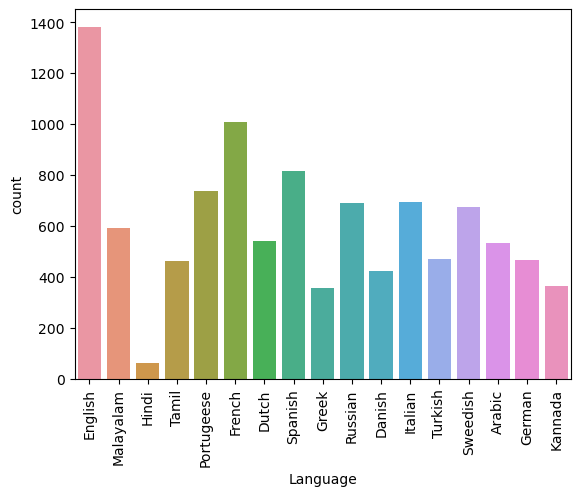

In [11]:
sns.countplot(x=df['Language'])
plt.xticks(rotation=90)
plt.show()

In [12]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

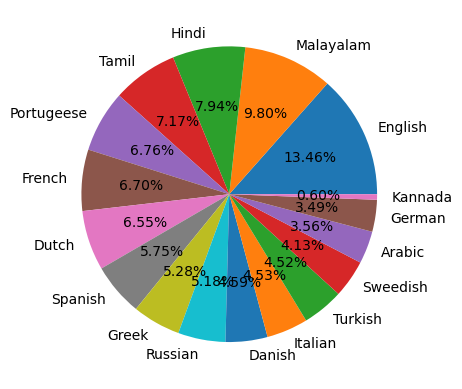

In [13]:
plt.pie(df['Language'].value_counts(), labels=['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], autopct='%.2f%%')
plt.show()

In [14]:
import nltk
import string
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
#Create a function to preprocess text 
def preprocess_text(text):
    punc = list(punctuation)
    stop = stopwords.words('english')
    bad_tokens = punc + stop
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return ' '.join(t for t in clean_tokens)

In [16]:
df['clean_text'] = df['Text'].apply(preprocess_text)
df.head()

,Text,Language,clean_text
0,"Nature, in the broadest sense, is the natural...",English,nature broadest sense natural physical materia...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature refer phenomenon physical world also li...
2,"The study of nature is a large, if not the onl...",English,the study nature large part science
3,"Although humans are part of nature, human acti...",English,although human part nature human activity ofte...
4,[1] The word nature is borrowed from the Old F...,English,the word nature borrowed old french nature der...


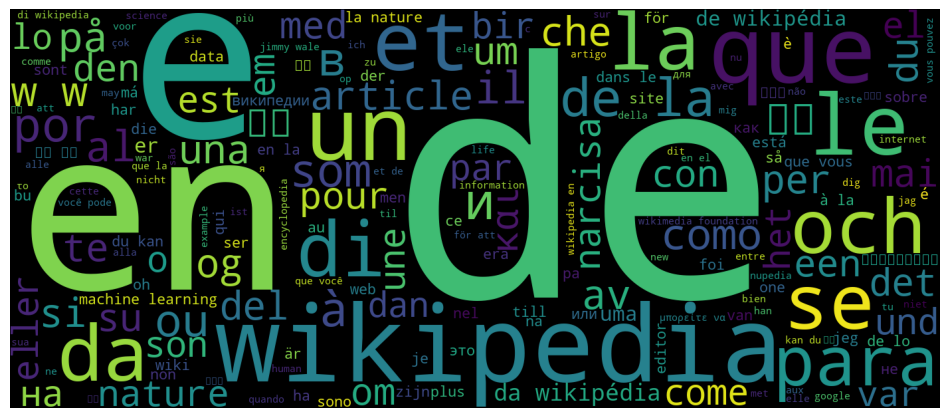

In [17]:
all_words = ' '.join(word for word in df['clean_text'])
from wordcloud import WordCloud
cloud = WordCloud(
    width = 1400,
    height= 600, 
    background_color = 'black').generate(all_words)
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [18]:
#Model building
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()

In [20]:
def encoder(text):
    if text == "English":
        return 1
    if text == "Malayalam":
        return 2
    if text == "Hindi":
        return 3
    if text == "Tamil":
        return 4
    if text == "Portugeese":
        return 5
    if text == "French":
        return 6
    if text == "Dutch":
        return 7
    if text == "Spanish":
        return 8
    if text == "Greek":
        return 9
    if text == "Russian":
        return 10
    if text == "Danish":
        return 11
    if text == "Italian":
        return 12
    if text == "Turkish":
        return 13
    if text == "Sweedish":
        return 14
    if text == "Arabic":
        return 15
    if text == "German":
        return 16
    if text == "Kannada":
        return 17

In [21]:
y = df['Language'].apply(encoder)
y

0         1
1         1
2         1
3         1
4         1
         ..
10332    17
10333    17
10334    17
10335    17
10336    17
Name: Language, Length: 10271, dtype: int64

In [25]:
x = df['clean_text']

In [26]:
x = vectorizer.fit_transform(x).toarray()

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred = lr.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test, y_pred))

Accuracy is:  0.8472019464720195


In [41]:
!pip install xgboost --upgrade

In [45]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
xgb_pred = xgb_classifier.predict(x_test)
print("Accuracy is:",accuracy_score(y_test, y_pred))

Accuracy is: 0.8472019464720195


In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [48]:
svc_pred = svc.predict(x_test)
print("Accuracy is:",accuracy_score(y_test, y_pred))

Accuracy is: 0.8472019464720195


In [30]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [50]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [51]:
mnb_pred = mnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, mnb_pred))

Accuracy Score: 0.8554744525547445


In [35]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [36]:
gnb_pred = gnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, gnb_pred))

Accuracy Score: 0.8968369829683698


In [31]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [34]:
bnb_pred = bnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, bnb_pred))

Accuracy Score: 0.47153284671532847


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
rf_pred = rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, rf_pred))

Accuracy Score: 0.8549878345498784


In [37]:
import pickle

In [38]:
pickle.dump(gnb, open("model.pkl", "wb"))

In [39]:
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))